In [1]:
import cv2
import numpy as np
import dlib
from matplotlib import pyplot as plt

# Initialize dlib's face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()

(-0.5, 499.5, 499.5, -0.5)

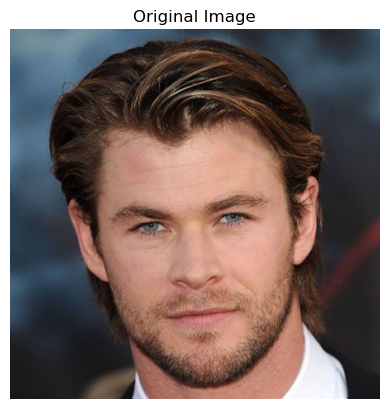

In [12]:
# Load the image
image_path = './test/test6.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

In [13]:
# Step 1: Identify face landmarks using dlib
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

Text(0.5, 1.0, 'Male')

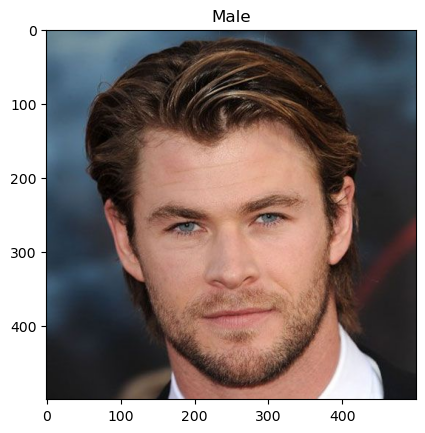

In [14]:
# Load the gender detection model
gender_model = cv2.dnn.readNet(
    "./model/gender_deploy.prototxt", 
    "./model/gender_net.caffemodel"
)
gender_list = ['Male', 'Female']

for i, face in enumerate(faces):
    # Extract the ROI of the face from the grayscale image
    x1, y1, x2, y2 = face.left(), face.top(), face.right() + 1, face.bottom() + 1
    face = image[y1:y2, x1:x2]

    # Preprocess the ROI and feed it to the gender detection model
    blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
    gender_model.setInput(blob)
    gender_preds = gender_model.forward()
    gender = gender_list[gender_preds[0].argmax()]

    # Draw the gender on the image

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(gender)